In [325]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## this for package import and data prepare

In [326]:

import utlis_2nd.cusdom as custom
import super_learn_task_expr2 as expr2
import warnings

read_abso_path="/Users/liangaoming/Documents/Ai_station/neural_find_sol/wgan_2nd/complex_center_dataset/combined_data.pt"
warnings.filterwarnings("ignore")

from collections import namedtuple
# 定义 Transition
Transition = namedtuple("Transition", ["state", "action", "reward", "next_state", "done"])
# 创建一个 Transition 对象
trans = Transition(state=1, action=2, reward=3, next_state=4, done=False)


In [327]:
# split data & get the t_steps
train_loader,valid_loader,test_loader,yaml_config =\
    custom.return_train_valid_test4loader(abso_path=read_abso_path)
# look（shape）
for batch_idx, (data, target) in enumerate(train_loader):
    print("shape:", data.shape)
    print("label for csv:",target.shape)
    break


load data & read yaml
shape: torch.Size([256, 100, 9])
label for csv: torch.Size([256])


# Define the omega_neural network from nn_base

## Here: we just to evaluate the
### 1.omega_neural network
input_shape: the shape means that we have 100 time steps and 2 variables input **[-1,100,2]**
output_shape: output **[-1,51,2]**
### 2.inference_neural network
input_shape: the shape means that we have 100 time steps and 2 variables input **[-1，100，2]**
output_shape: output **[-1,100,2]**



In [328]:
results_path= "/Users/liangaoming/Documents/Ai_station/neural_find_sol/wgan_2nd/expr2/expr2_results/expr2_"
expr2.config["train_nomin"]= int((yaml_config['train_size_percent']*yaml_config['all_solus_numbers'])/yaml_config["batch_size"])
expr2.config["valid_nomin"]= int((yaml_config['valid_size_percent']*yaml_config['all_solus_numbers'])/yaml_config["batch_size"])
expr2.config["test_nomin"]= int((yaml_config['test_size_percent']*yaml_config['all_solus_numbers'])/yaml_config["batch_size"])
expr2.config["train_loader"]= train_loader
expr2.config["valid_loader"]= valid_loader
expr2.config["test_loader"]= test_loader
expr2.config["data_length"]= yaml_config["data_length"]
expr2.config["device"] = "cpu"
expr2.config["hidden_act"]= "rational"
expr2.config["inference_output_act"]="identity"
expr2.config["omega_output_act"]="softmax"
expr2.config["inference_output_act"]="Identity"
expr2.config["vari_number"]= yaml_config["vari_number"]
expr2.config["sample_vesting"]=2 #2s
expr2.config["Inference_num_epoch"]=100

the prior knowledge is {'basis_1': 'x**0', 'basis_2': 'sin', 'basis_3': 'cos'}
output_dim 202
output_act is Identity
hi
test_only_inference
start train_inference
tensor([ 1,  6,  0,  7,  4,  3,  8, 22,  2, 23, 14, 35])
counts tensor([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])
lables 51


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (51,) and arg 1 with shape (36,).

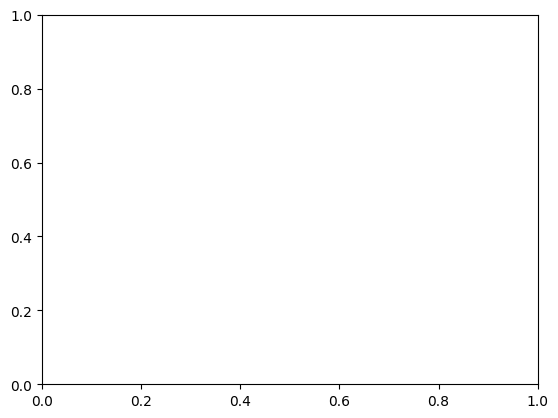

In [329]:
# return test' results
expr2.do_expr(                          results_save_path=results_path,
                                        folder_num=97,
                                        train_config=expr2.config,
                                        model_type="inference_net")


## here is a plot function to output a figure


In [ ]:
import matplotlib.pyplot as plt
import os
import numpy as np

In [ ]:
def plot_loss(path, loss_train, x_log=False):

    """
    Plot loss.
    Args:
        path (str): path.
        loss_train (list): list of training loss.
        x_log (bool): whether to use log scale for x-axis.
    Returns:
        None.
    """
    plt.figure()
    ax = plt.gca()
    y2 = np.asarray(loss_train)
    plt.plot(y2, 'k-', label='Train')
    plt.xlabel('epoch', fontsize=18)
    ax.tick_params(labelsize=18)
    plt.yscale('log')
    if x_log == False:
        fntmp = os.path.join(path, 'loss.png')

    else:
        plt.xscale('log')
        fntmp = os.path.join(path, 'loss_log.png')
    plt.tight_layout()
    plt.savefig(fntmp,dpi=300)

    plt.close()
def plot_model_output(path, args, output, epoch):

    plt.figure()
    ax = plt.gca()

    plt.plot(args.training_input.detach().cpu().numpy(),
             args.training_target.detach().cpu().numpy(), 'b*', label='True')
    plt.plot(args.test_input.detach().cpu().numpy(),
             output.detach().cpu().numpy(), 'r-', label='Test')

    ax.tick_params(labelsize=18)
    plt.legend(fontsize=18)
    fntmp = os.path.join(path, 'output', str(epoch)+'.png')

    plt.savefig(fntmp, dpi=300)


    plt.close()
def my_fft(data, freq_len=40, isnorm=1):

    """
    This function performs FFT on the given data.

    Args:
    data (numpy.ndarray): The input data.
    freq_len (int): The length of the frequency.
    isnorm (int): The normalization factor.

    Returns:
    return_fft (numpy.ndarray): The FFT output array.
    """

    # second_diff_input = np.mean(np.diff(np.diff(np.squeeze(x_input))))
    # if abs(second_diff_input) < 1e-10:
    datat = np.squeeze(data)
    datat_fft = np.fft.fft(datat)
    ind2 = range(freq_len)
    fft_coe = datat_fft[ind2]
    if isnorm == 1:
        return_fft = np.absolute(fft_coe)
    else:
        return_fft = fft_coe

    return return_fft
def SelectPeakIndex(FFT_Data, endpoint=True):

    """
    This function selects the peak index from FFT data.

    Args:
    FFT_Data (numpy.ndarray): The FFT data array.
    endpoint (bool): Whether to include endpoints or not. Default is True.

    Returns:
    sel_ind (numpy.ndarray): Selected index array with peaks.
    """

    D1 = FFT_Data[1:-1]-FFT_Data[0:-2]
    D2 = FFT_Data[1:-1]-FFT_Data[2:]
    D3 = np.logical_and(D1 > 0, D2 > 0)
    tmp = np.where(D3 == True)
    sel_ind = tmp[0]+1
    if endpoint: #
        if FFT_Data[0]-FFT_Data[1] > 0:
            sel_ind = np.concatenate([[0], sel_ind])
        if FFT_Data[-1]-FFT_Data[-2] > 0:
            Last_ind = len(FFT_Data)-1
            sel_ind = np.concatenate([sel_ind, [Last_ind]])
    return sel_ind
def plot_freq_distr(args):
    """
    Plot frequency distribution and the heatmap of the given training target and output.

    Args:
    args: A dictionary containing training target and output.

    Returns:
    None
    """
    y_fft = my_fft(args.training_target.detach().cpu().numpy()) / \
        args.training_size
    plt.figure()
    ax = plt.gca()
    plt.semilogy(y_fft+1e-5, label='Target')
    idx = SelectPeakIndex(y_fft, endpoint=False)
    plt.semilogy(idx, y_fft[idx]+1e-5, 'o')
    y_fft_pred = my_fft(args.training_output[-1])/args.training_size
    plt.semilogy(y_fft_pred+1e-5, label='Model output')
    plt.semilogy(idx, y_fft_pred[idx]+1e-5, 'o')
    plt.legend(fontsize=22)
    plt.xlabel('freq idx', fontsize=22)
    plt.ylabel('freq', fontsize=22)
    plt.gca().tick_params(axis='y', labelsize=22)
    plt.gca().tick_params(axis='x', labelsize=22)
    plt.tight_layout()
    plt.savefig(os.path.join(args.path, 'fft.png'), dpi=300)
    plt.show()
    plt.close()

    y_pred_epoch = np.squeeze(args.training_output)
    idx1 = idx[:3]
    abs_err = np.zeros([len(idx1), len(args.training_output)])
    y_fft = my_fft(args.training_target)
    tmp1 = y_fft[idx1]
    print(abs_err.shape)
    for i in range(len(y_pred_epoch)):
        tmp2 = my_fft(y_pred_epoch[i])[idx1]
        abs_err[:, i] = np.abs(tmp1 - tmp2)/(1e-5 + tmp1)



    plt.figure(figsize=(8, 6))
    ax = plt.gca()
    plt.pcolor(abs_err, cmap='RdBu', vmin=0.1, vmax=1, linewidths=0.4)
    plt.colorbar()


    plt.xlabel('Epoch', fontsize=22)

    # Set the y-axis ticks and labels to 1, 2, 3, and rotate the labels
    plt.yticks([0.5, 1.5, 2.5], [1, 2, 3], rotation=0, fontsize=22)

    # Set the y-axis tick parameters to hide the tick marks and set the tick label size
    plt.gca().yaxis.set_tick_params(size=0)
    plt.gca().tick_params(axis='y', labelsize=22)
    plt.gca().tick_params(axis='x', labelsize=22)


    plt.title('Absolute Error', fontsize=22)

    plt.tight_layout()

    plt.savefig(os.path.join(args.path, 'hot.png'))
    plt.show()
    plt.close()
def plot_target_pred_result(target,pred):
    """
    Plot the target.

    Args:
        target_tensor_tensor (torch.Tensor): The target tensor.
        pred_tensor (torch.Tensor): The prediction tensor.

    """
    plt.figure()
    ax = plt.gca()

    plt.plot(target.detach().cpu().numpy(),
             target.cpu().numpy(), 'b*', label='True')
    plt.plot(target.detach().cpu().numpy(),
             pred.cpu().numpy(), 'r-', label='Test')

    ax.tick_params(labelsize=18)
    plt.legend(fontsize=18)
    plt.show()
    print("The target function:")

# read the .pth

In [ ]:
analysis_pth="/Users/liangaoming/Documents/Ai_station/neural_find_sol/wgan_2nd/expr2/expr2_results/expr2_97_data/train_process/inference_net/analysis_files/tensor_0.pth"

In [267]:
import torch
index= torch.randint(low=0,high=100, size=(20,))


In [271]:
import torch

# 假设有10个位置，其中索引 2 的权重最高
weights = torch.tensor([0.05, 0.05, 0.4, 0.05, 0.05, 0.1, 0.1, 0.1, 0.05, 0.05])

# 采样 10 个索引，允许重复
sampled_indices = torch.multinomial(weights, 10, replacement=True)

print("Sampled indices:", sampled_indices)


Sampled indices: tensor([2, 2, 0, 3, 2, 2, 3, 5, 0, 5])


In [275]:
import torch

# 初始化一个三维张量，维度为 [256, 100, 2]
tensor = torch.rand([256, 100, 2])

# 初始化一个用于存储结果的列表
result_list = []

# 在第二个维度（大小为100）上应用多项式随机抽样
for i in range(tensor.shape[0]):
    # 对每一个 [100, 2] 的子张量应用 torch.multinomial
    sampled_indices = torch.multinomial(tensor[i,:,0], 10, replacement=True)  # 假设我们抽样10个点
    print(sampled_indices.shape)
    result_list.append(sampled_indices)

# 将结果转化为张量
result_tensor = torch.stack(result_list, dim=0)

print("Result tensor shape:", result_tensor.shape)


torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10

tensor([[67, 42, 67,  ...,  0, 53, 34],
        [91,  2, 55,  ..., 93, 32, 24],
        [30,  5, 16,  ...,  3, 31,  7],
        ...,
        [79, 52, 53,  ..., 74, 23, 82],
        [50, 43, 77,  ..., 97, 76, 91],
        [20, 41, 56,  ..., 15, 80, 51]])

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (3,) and arg 1 with shape (36,).

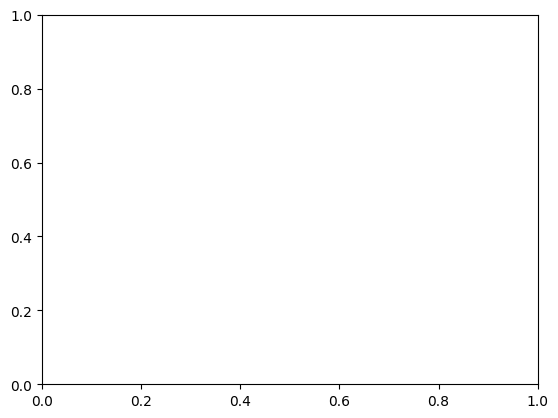

In [330]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# 权重和样本数
weights = torch.tensor([0.2, 0.3, 0.5])
n_samples = 1000

# 使用 torch.multinomial 进行多项式抽样
samples = torch.multinomial(weights, n_samples, replacement=True)
samples=torch.tensor([ 1,  6,  0,  7,  4,  3,  8, 22,  2, 23, 14, 35])
# 计数每个类别的样本数
counts = torch.bincount(samples)

# 可视化
labels = ['Class 0', 'Class 1', 'Class 2']
y_pos = np.arange(len(labels))

plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Multinomial Distribution Sampling')

plt.show()


In [317]:
samples

tensor([1, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 0,
        2, 1, 2, 0, 0, 0, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 0, 2, 1, 2, 1, 0, 2,
        2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 1, 1,
        0, 1, 1, 2, 2, 1, 1, 0, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 1, 1,
        1, 1, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 1, 2, 2, 1, 0, 1, 1, 2, 1, 0,
        1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 0, 2, 1, 0, 2, 2, 2, 0, 2, 1, 2, 2, 1,
        0, 1, 1, 0, 1, 0, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2,
        2, 2, 2, 2, 1, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 2, 0, 1, 0, 0, 0, 1, 1, 2,
        1, 2, 0, 2, 0, 0, 1, 2, 0, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 2, 1,
        0, 0, 2, 1, 2, 0, 2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 0,
        0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 0, 0, 1, 2, 2, 2, 1, 1, 2, 2, 1,
        2, 2, 1, 2, 0, 2, 2, 2, 2, 1, 2, 0, 1, 2, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1,
        1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2,